In [55]:
import tensorflow as tf
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Input=1
Output=1
Hidden=10


x=tf.placeholder(tf.float32,shape=[None,Input],name='input')
_y=tf.placeholder(tf.float32,shape=[None,Output],name='output')

wij=tf.Variable(tf.random_normal([Input,Hidden],stddev=1,seed=1))
wjk=tf.Variable(tf.random_normal([Hidden,Output],stddev=1,seed=1))


In [56]:
h=tf.matmul(x,wij)
y=tf.matmul(h,wjk)   # y is output of network

loss=tf.losses.mean_squared_error(y,_y)

train_step=tf.train.AdamOptimizer(0.001).minimize(loss)


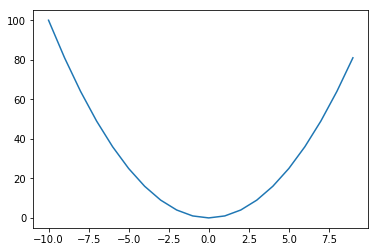

In [64]:
M=100
X=arange(-10,10,1)
Y=[[x**2 ] for x in X]
X=mat(X).T
Y=mat(Y)
plt.plot(X,Y)
plt.show()


In [ ]:
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    
    Epoch=5000
    batch=200
    error=[]
    for i in range(Epoch):
        s=(i*batch)%M
        t=s+batch
        
        sess.run(train_step,feed_dict={x:X,_y:Y})
        if(i==0 or (i+1)%1000==0):
            error.append(sess.run(loss,feed_dict={x:X,_y:Y}))
            print(i+1,":",error[-1])
    yy=sess.run(y,feed_dict={x:X})   
    plt.plot(yy)
    plt.plot(Y)
    plt.show()

    YY=Y.copy()
    print('test...')
    m,n=shape(X)
    for k in range(m*n):
        YY[int(k/n)][k%n]=yy[k]
    
    